In [1]:
include("hotrg.jl")
include("ising.jl")
include("potts.jl")
using LsqFit, Plots, Printf, LaTeXStrings
using Logging
Logging.disable_logging(Logging.Warn);

In [2]:
theme(:dao)
default(
  fontfamily = "Times Roman",
  guidefontsize = 12,
  tickfontsize = 10,
  legendfontsize = 10,
  markerstrokewidth = 2,
  margin = 5Plots.mm,
  size = (600, 400),
  grid = false,
  foreground_color_legend = nothing,
  background_color_legend = colorant"rgba(255,255,255,0.6)",
  linewidth = 1
)

## Calculation of crosscap/rainbow free energy term for the Ising model and three-state Potts model

In [3]:
χ = 16
stepnum = 7
eigvalnum = 3;

In [4]:
_, cftdata_ising = hotrg(Ising.bulk(inv(Ising.criticaltemperature()))...; maxdim = χ, stepnum, eigvalnum);

In [5]:
_, cftdata_ising_reflect = hotrg(Ising.bulk(inv(Ising.criticaltemperature()))...; maxdim = χ, stepnum, eigvalnum, copybelow = copybelow_reflect);

In [6]:
_, cftdata_potts3 = hotrg(Potts.bulk(inv(Potts.criticaltemperature(q = 3)); q = 3)...; maxdim = χ, stepnum, eigvalnum);

In [7]:
_, cftdata_potts3_reflect = hotrg(Potts.bulk(inv(Potts.criticaltemperature(q = 3)); q = 3)...; maxdim = χ, stepnum, eigvalnum, copybelow = copybelow_reflect);

## Plots of rainbow free energy term

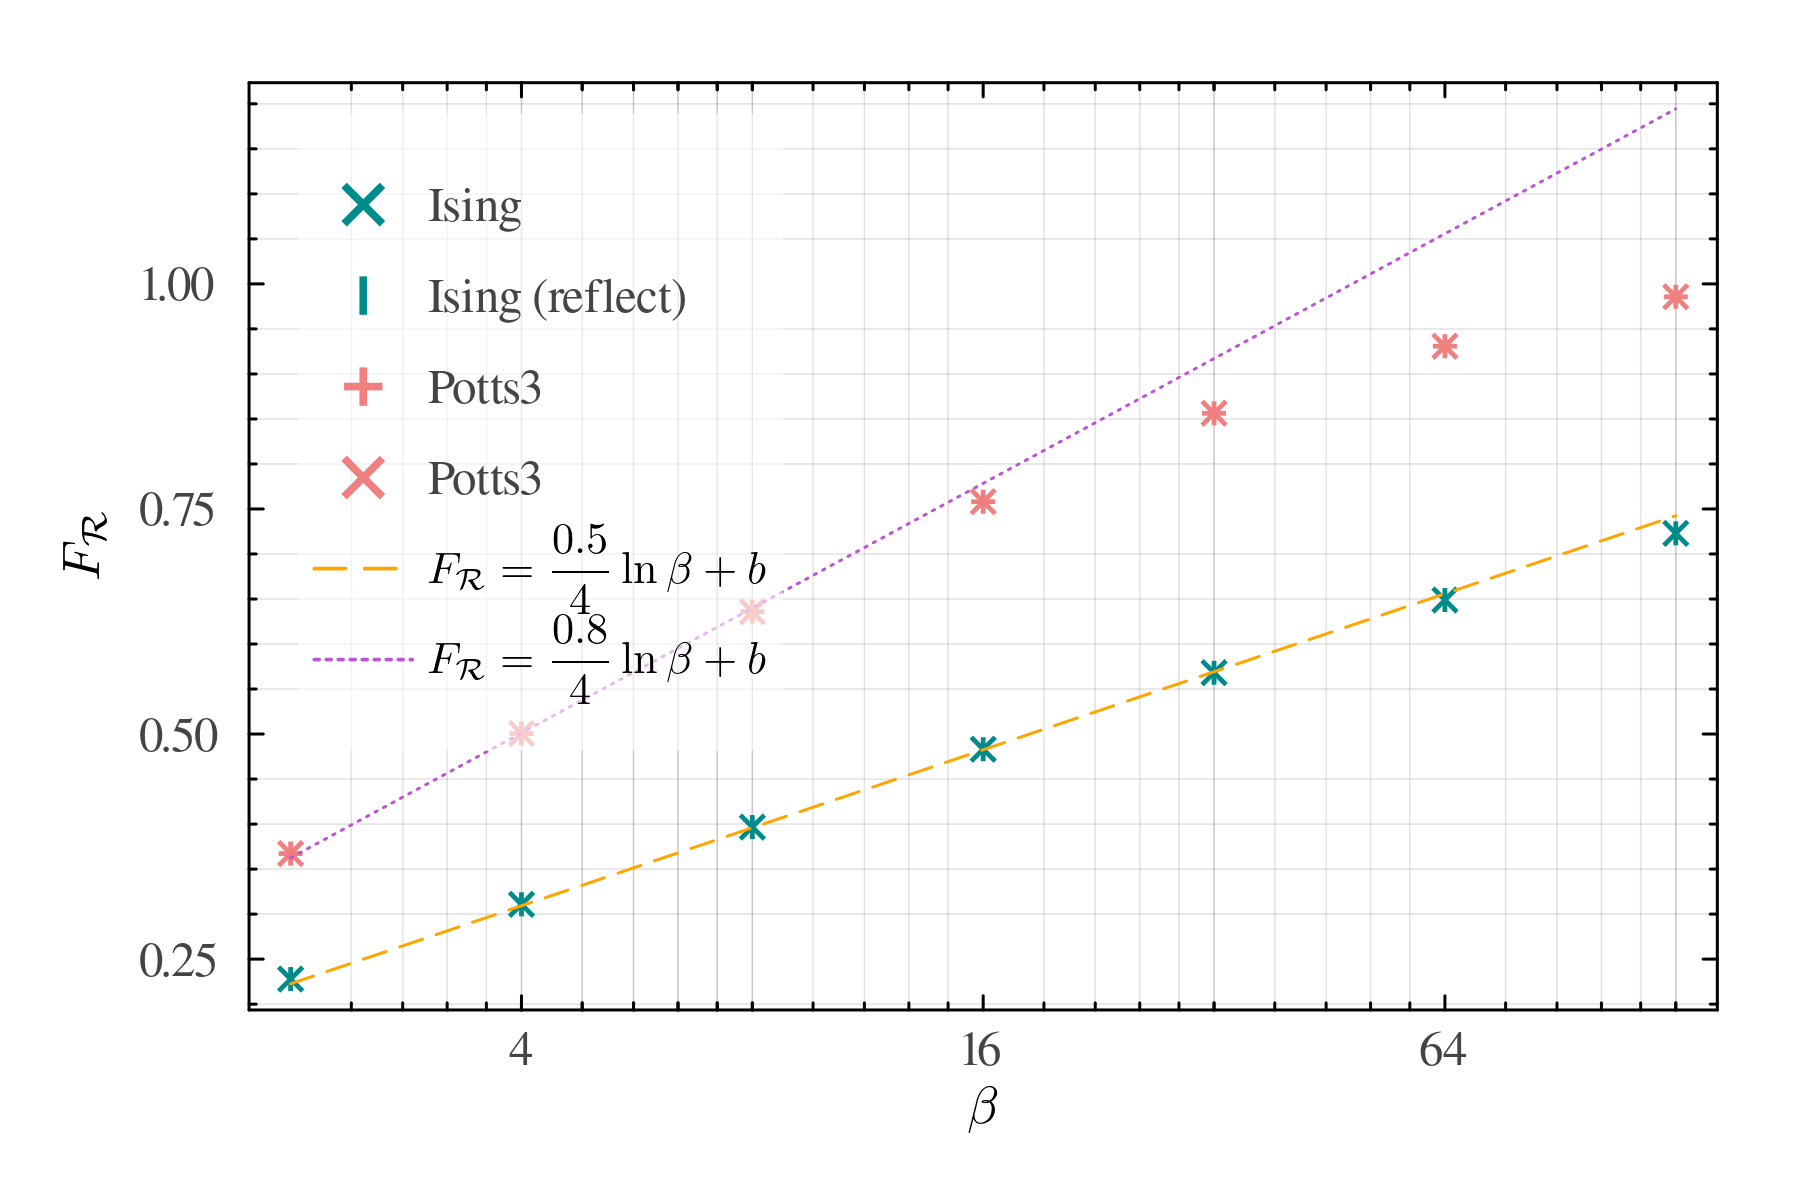

In [8]:
fr_ising = log.(abs.(cftdata_ising["<R|i>"][1, :]))
fr_ising_reflect = log.(abs.(cftdata_ising_reflect["<R|i>"][1, :]))
fr_potts3 = log.(abs.(cftdata_potts3["<R|i>"][1, :]))
fr_potts3_reflect = log.(abs.(cftdata_potts3_reflect["<R|i>"][1, :]))
β = 2 .^ (1:stepnum)

fitrange_ising = 1:6
fitrange_potts3 = 1:3

f_ising(x, p) = @. (Ising.centralcharge() / 4) * log(x) + p[1]
fit_ising = curve_fit(f_ising, β[fitrange_ising], fr_ising[fitrange_ising], [0.])
f_ising(x) = f_ising(x, fit_ising.param)
f_potts3(x, p) = @. (Potts.centralcharge(q = 3) / 4) * log(x) + p[1]
fit_potts3 = curve_fit(f_potts3, β[fitrange_potts3], fr_potts3[fitrange_potts3], [0.])
f_potts3(x) = f_potts3(x, fit_potts3.param)

p = plot()
scatter!(p, β, fr_ising; xscale = :log2, xlabel = L"\beta", ylabel = L"F_\mathcal{R}", legend = :topleft,
  label = "Ising", markershape = :x, markercolor = :darkcyan, xticks = [4, 16, 64] |> x -> (x, string.(x)), format = :png)
scatter!(p, β, fr_ising_reflect; label = "Ising (reflect)", markershape = :vline, markercolor = :darkcyan)
scatter!(p, β, fr_potts3; label = "Potts3", markershape = :+, markercolor = :lightcoral)
scatter!(p, β, fr_potts3_reflect; label = "Potts3", markershape = :x, markercolor = :lightcoral)
plot!(p, β, f_ising(β); line = :dash, linecolor = :orange, label = L"F_\mathcal{R} = \frac{0.5}{4}\ln\beta + b")
plot!(p, β, f_potts3(β); line = :dot, linecolor = :mediumorchid, label = L"F_\mathcal{R} = \frac{0.8}{4}\ln\beta + b")
p[:dpi] = round(Int, 3 * p[:dpi])
p

## Plots of crosscap free energy term

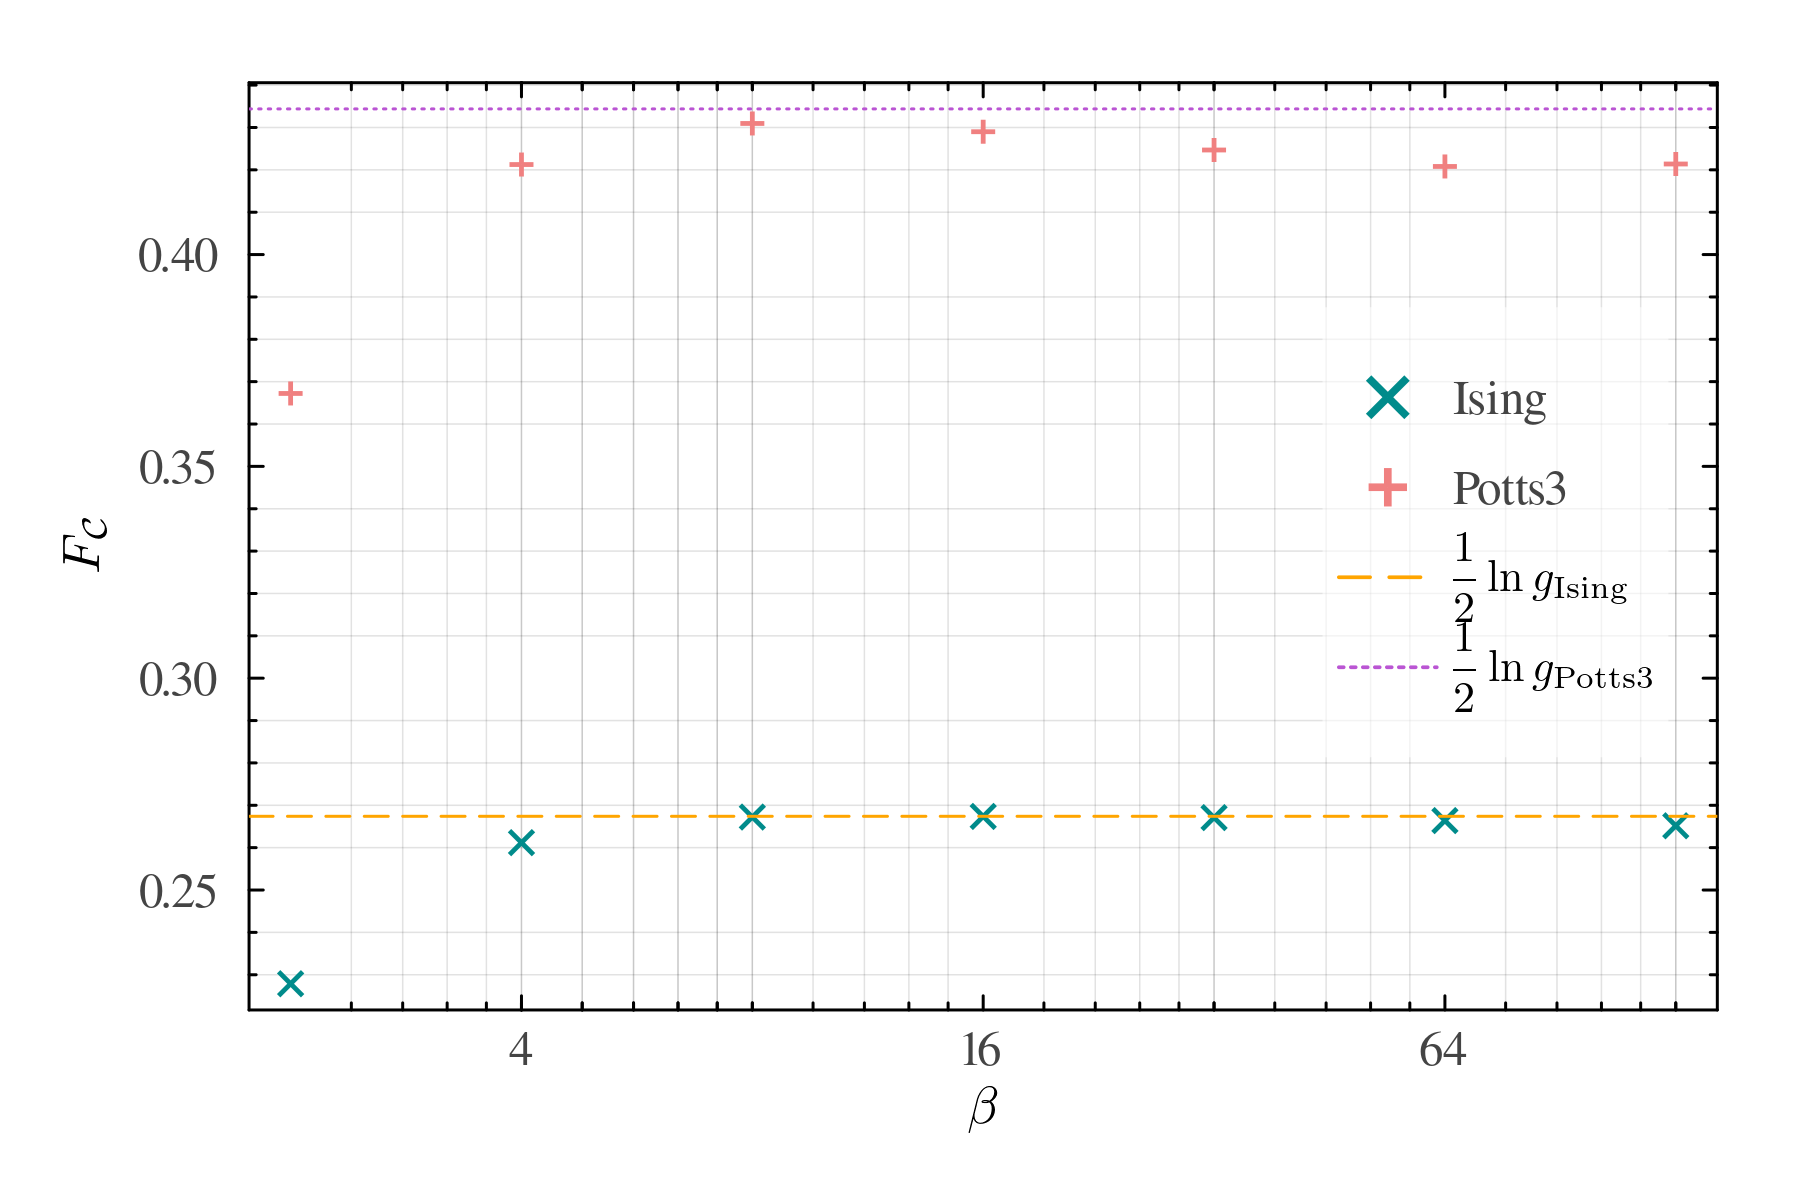

In [9]:
fc_ising = log.(abs.(cftdata_ising["<C|i>"][1, :]))
fc_potts3 = log.(abs.(cftdata_potts3["<C|i>"][1, :]))
β = 2 .^ (1:stepnum)

p = plot()
scatter!(p, β, fc_ising; xscale = :log2, xlabel = L"\beta", ylabel = L"F_\mathcal{C}",
  label = "Ising", markershape = :x, markercolor = :darkcyan, xticks = [4, 16, 64] |> x -> (x, string.(x)), legend = :right)
scatter!(p, β, fc_potts3; label = "Potts3", markershape = :+, markercolor = :lightcoral, format = :png)
hline!(p, [log(Ising.quantumdimension()) / 2]; line = :dash, linecolor = :orange, label = L"\frac{1}{2}\ln g_{\mathrm{Ising}}")
hline!(p, [log(Potts.quantumdimension(q = 3)) / 2]; line = :dot, linecolor = :mediumorchid, label = L"\frac{1}{2}\ln g_{\mathrm{Potts3}}")
p[:dpi] = round(Int, 3 * p[:dpi])
p

## Plot one-point function of the Ising CFT

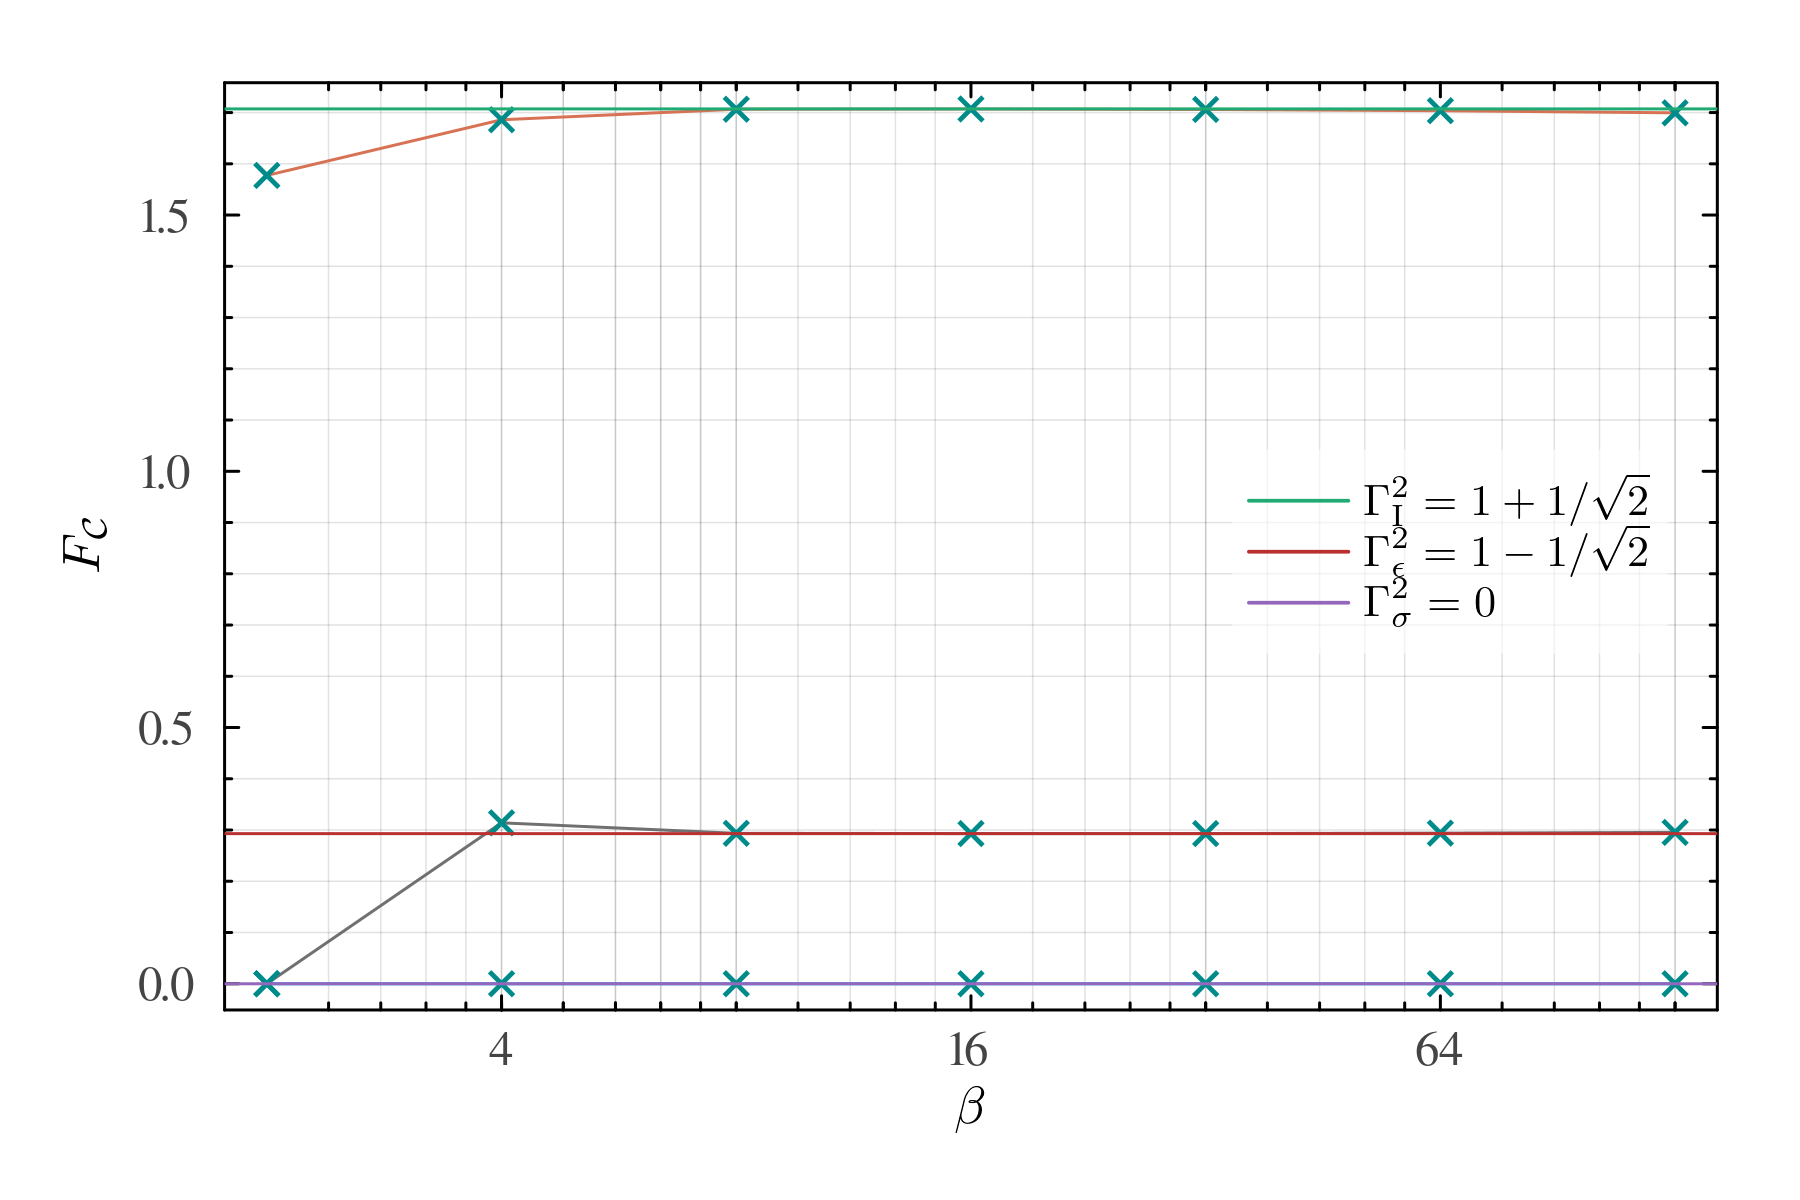

In [10]:
gamma2_ising = cftdata_ising["<C|i>"][1:3, :] .^ 2
β = 2 .^ (1:stepnum)

p = plot()
plot!(p, β, [gamma2_ising[i, :] for i in 1:3]; xscale = :log2, xlabel = L"\beta", ylabel = L"F_\mathcal{C}",
  label = nothing, markershape = :x, markercolor = :darkcyan, xticks = [4, 16, 64] |> x -> (x, string.(x)), legend = :right)
hline!(p, [1 + 1 / √2], label = L"\Gamma_\mathrm{I}^2 = 1 + 1 / \sqrt{2}")
hline!(p, [1 - 1 / √2], label = L"\Gamma_{\epsilon}^2 = 1 - 1 / \sqrt{2}")
hline!(p, [0], label = L"\Gamma_{\sigma}^2 = 0")
p[:dpi] = round(Int, 3 * p[:dpi])
p